In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("manufacturing_quality.csv")
df.describe()

y = df["Quality Rating"].values
X = df.drop(columns=["Quality Rating"]).values

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])

scaled_df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
count,3.957000e+03,3.957000e+03,3.957000e+03,3.957000e+03,3.957000e+03
mean,-2.343337e-16,-5.095186e-16,-1.598138e-16,2.424141e-17,-1.023526e-16
std,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00
min,-1.720678e+00,-1.700229e+00,-1.674586e+00,-1.594770e+00,-1.189265e+00
25%,-8.457730e-01,-8.875927e-01,-7.935814e-01,-8.610222e-01,-8.689523e-01
50%,-2.462366e-02,2.945485e-03,-1.900108e-01,-1.476627e-01,-2.899380e-01
75%,8.830774e-01,8.549395e-01,6.678394e-01,8.264980e-01,7.693808e-01
max,1.719610e+00,1.764517e+00,3.024399e+00,2.336449e+00,2.232231e+00


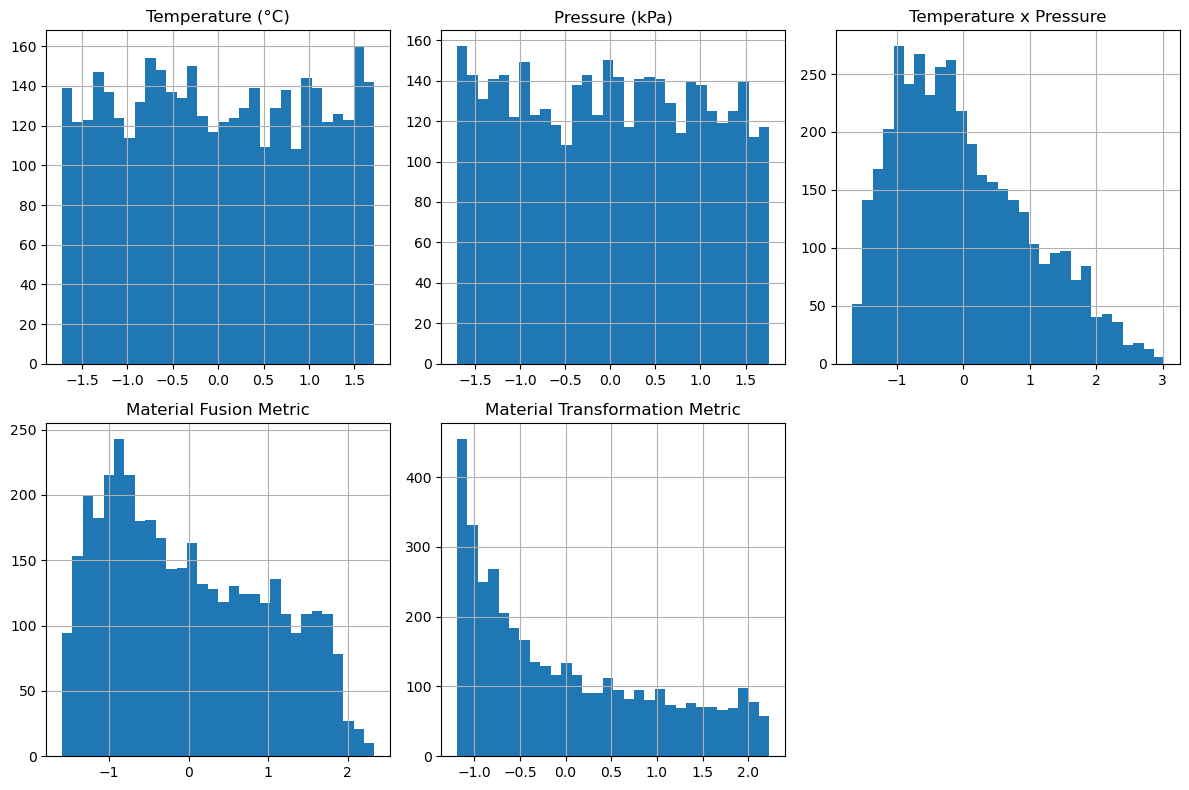

In [4]:
scaled_df.hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

In [7]:
# Split training data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the model on the reduced training set
rf = RandomForestRegressor(random_state=42)
rf.fit(X_tr, y_tr)

# Evaluate on validation set
val_pred = rf.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
print(f"Validation MSE: {val_mse:.4f}")

Validation MSE: 0.0082


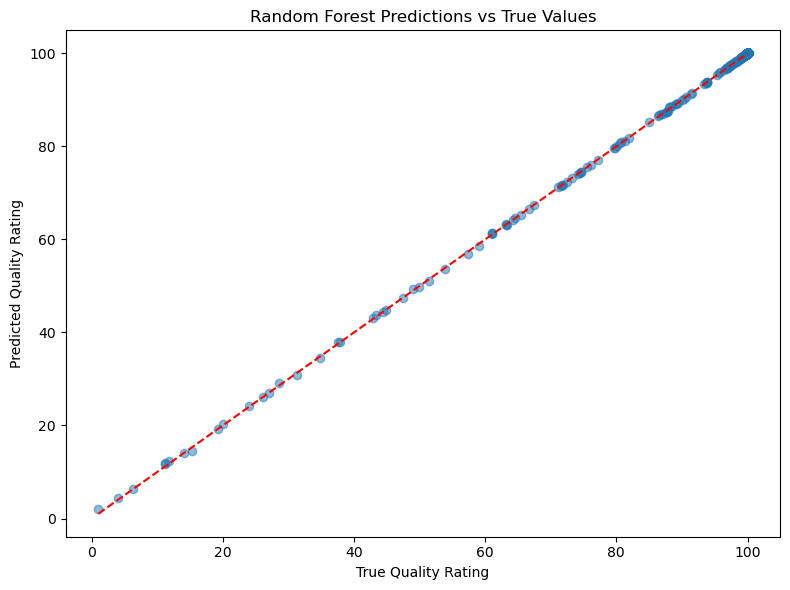

Mean Squared Error: 0.0073
R^2 Score: 1.0000


In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Random Forest Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.tight_layout()
plt.show()

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")